# Retail Sales Case Study

## Introduction
This project involves a comprehensive analysis of a dataset provided by a prominent retail giant. The dataset encompasses crucial information on customer demographics, purchase behavior, and response to marketing campaigns. The primary objective is to glean actionable insights into customer behavior and campaign effectiveness to drive strategic business decisions.

## Dataset Overview
The dataset comprises three essential files:

1. **demographics.txt**: Contains granular details on customer demographics.
2. **behaviour.json**: Provides insightful data regarding customer purchase behavior.
3. **campaign.json**: Offers valuable insights into customer response patterns to marketing campaigns.

### Data Dictionary
#### demographics.txt
- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's educational attainment
- **Marital_Status**: Customer's marital status
- **Income**: Customer's annual household income
- **Kidhome**: Number of children in the customer's household
- **Teenhome**: Number of teenagers in the customer's household
- **Dt_Customer**: Date of customer enrollment with the company
- **Country**: Customer's geographical location

#### behaviour.json
- **Recency**: Number of days since the customer's last purchase
- **MntWines**: Expenditure on wine over the past 2 years
- **MntFruits**: Expenditure on fruits over the past 2 years
- **MntMeatProducts**: Expenditure on meat products over the past 2 years
- **MntFishProducts**: Expenditure on fish products over the past 2 years
- **MntSweetProducts**: Expenditure on sweet products over the past 2 years
- **MntGoldProducts**: Expenditure on gold products over the past 2 years
- **NumDealsPurchases**: Number of purchases made with a discount
- **NumWebPurchases**: Number of purchases made through the company's website
- **NumCatalogPurchases**: Number of purchases made using a catalog
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to the company's website in the last month

#### campaign.json
- **AcceptedCmp1**: Customer's response to the 1st campaign (1 for acceptance, 0 otherwise)
- **AcceptedCmp2**: Customer's response to the 2nd campaign (1 for acceptance, 0 otherwise)
- **AcceptedCmp3**: Customer's response to the 3rd campaign (1 for acceptance, 0 otherwise)
- **AcceptedCmp4**: Customer's response to the 4th campaign (1 for acceptance, 0 otherwise)
- **AcceptedCmp5**: Customer's response to the 5th campaign (1 for acceptance, 0 otherwise)
- **Response**: Customer's response to the latest campaign (1 for acceptance, 0 otherwise)
- **Complain**: Customer's complaint status (1 if complained in the last 2 years, 0 otherwise)

## Business Problem
The retailer aims to gain a comprehensive understanding of customer responses to various marketing campaigns. Through meticulous analysis of the dataset, we aim to address specific business queries and unearth actionable insights that drive informed decision-making.

### Business Questions
1. **Data Quality and Check (Task 1)**:
    - Create a consolidated view of the data by integrating information from all files.
    - Identify variables necessitating data cleaning and execute requisite data cleansing procedures.
    - Generate a meticulous data quality report, highlighting key insights.
    - Identify and address any outliers or extreme values within the dataset.
2. **Business Analysis and Hypothesis (Task 2)**:
    - Formulate and validate hypotheses regarding customer spending across different product categories and response rates to marketing campaigns.
    - Conduct a comprehensive funnel analysis to ascertain campaign acceptance rates.
    - Investigate the influence of income levels on expenditure across various product categories.
    - Test the hypothesis suggesting that recent customers exhibit lower complaint rates compared to established customers.
    - Explore the correlation between customer responses across multiple campaigns.
    - Profile customers who exhibit positive response behaviors in marketing campaigns.

The subsequent sections will delve into the analysis process, aiming to provide actionable insights that cater to the retailer's strategic objectives.

## Data Exploration and Preprocessing

### Importing Necessary Libraries

In [1]:
# Importing essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Loading Demographics Dataset

In [2]:
# Open the text file
file_path = 'demographics.txt'

# Read the file into a DataFrame using pandas
demog = pd.read_csv(file_path, sep='\t')

# Display first five rows
demog.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP


#### Looking into demographic's info

In [3]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2240 non-null   int64 
 1   Year_Birth      2240 non-null   int64 
 2   Education       2240 non-null   object
 3   Marital_Status  2240 non-null   object
 4    Income         2216 non-null   object
 5   Kidhome         2240 non-null   int64 
 6   Teenhome        2240 non-null   int64 
 7   Dt_Customer     2240 non-null   object
 8   Country         2240 non-null   object
dtypes: int64(4), object(5)
memory usage: 157.6+ KB


### Loading Behaviour Dataset

In [4]:
# Load the JSON data from the file
with open('behaviour.json') as f:
    data = json.load(f)

# Initialize a dictionary to store transformed data
transformed_data = {}

# Iterate over each item in the JSON data
for item in data:
    for key, value in item.items():
        # Extract attribute names and initialize dictionary keys if not already done
        if not transformed_data:
            transformed_data = {attr: [] for attr in value.keys()}
        
        # Append values to the corresponding lists in the dictionary
        for attribute, val in value.items():
            transformed_data[attribute].append(val)
            
        # Append ID values to the 'ID' list
        if 'ID' not in transformed_data:
            transformed_data['ID'] = []
        transformed_data['ID'].append(key)

# Create a DataFrame from the transformed data
behav = pd.DataFrame(transformed_data)

# Reorder columns such that 'ID' appears first
column_order = ['ID'] + [col for col in behav.columns if col != 'ID']
behav = behav[column_order]

# Display the DataFrame
behav.head(10)

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,ID_1826,0,189,104,379,111,189,218,1,4,4,6,1
1,ID_1,0,464,5,64,7,0,37,1,7,3,7,5
2,ID_10476,0,134,11,59,15,2,30,1,3,2,5,2
3,ID_1386,0,10,0,1,0,0,0,1,1,0,2,7
4,ID_5371,0,6,16,24,11,0,34,2,3,1,2,7
5,ID_7348,0,336,130,411,240,32,43,1,4,7,5,2
6,ID_4073,0,769,80,252,15,34,65,1,10,10,7,6
7,ID_1991,0,78,0,11,0,0,7,1,2,1,3,5
8,ID_4047,0,384,0,102,21,32,5,3,6,2,9,4
9,ID_9477,0,384,0,102,21,32,5,3,6,2,9,4


#### Transforming behaviour's table ID column into usable form

In [5]:
# Removing strings from ID column to match with other tables
behav['ID'] = behav['ID'].str.extract('(\d+)').astype(int)
behav.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1826,0,189,104,379,111,189,218,1,4,4,6,1
1,1,0,464,5,64,7,0,37,1,7,3,7,5
2,10476,0,134,11,59,15,2,30,1,3,2,5,2
3,1386,0,10,0,1,0,0,0,1,1,0,2,7
4,5371,0,6,16,24,11,0,34,2,3,1,2,7


#### Looking into Behaviour's info

In [6]:
behav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int32
 1   Recency              2240 non-null   int64
 2   MntWines             2240 non-null   int64
 3   MntFruits            2240 non-null   int64
 4   MntMeatProducts      2240 non-null   int64
 5   MntFishProducts      2240 non-null   int64
 6   MntSweetProducts     2240 non-null   int64
 7   MntGoldProds         2240 non-null   int64
 8   NumDealsPurchases    2240 non-null   int64
 9   NumWebPurchases      2240 non-null   int64
 10  NumCatalogPurchases  2240 non-null   int64
 11  NumStorePurchases    2240 non-null   int64
 12  NumWebVisitsMonth    2240 non-null   int64
dtypes: int32(1), int64(12)
memory usage: 218.9 KB


### Loading Campaign Dataset

In [7]:
# Load the JSON data from the file
with open('campaign.json') as f:
    data = json.load(f)

# Initialize a dictionary to store transformed data
transformed_data2 = {}

# Iterate over each item in the JSON data
for item in data:
    for key, value in item.items():
        # Extract attribute names and initialize dictionary keys if not already done
        if not transformed_data2:
            transformed_data2 = {attr: [] for attr in value.keys()}
        
        # Append values to the corresponding lists in the dictionary
        for attribute, val in value.items():
            transformed_data2[attribute].append(val)
            
        # Append ID values to the 'ID' list
        if 'ID' not in transformed_data2:
            transformed_data2['ID'] = []
        transformed_data2['ID'].append(key)

# Create a DataFrame from the transformed data
campa = pd.DataFrame(transformed_data2)

# Reorder columns such that 'ID' appears first
column_order = ['ID'] + [col for col in campa.columns if col != 'ID']
campa = campa[column_order]

# Display the DataFrame
campa.head(10)

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,ID_1826,0,0,0,0,0,1,0
1,ID_1,0,1,0,0,0,1,0
2,ID_10476,0,0,0,0,0,0,0
3,ID_1386,0,0,0,0,0,0,0
4,ID_5371,0,0,1,0,0,1,0
5,ID_7348,0,0,0,0,0,1,0
6,ID_4073,0,0,1,0,0,1,0
7,ID_1991,0,0,0,0,0,0,0
8,ID_4047,0,0,0,0,0,0,0
9,ID_9477,0,0,0,0,0,0,0


#### Transforming Campaign's table ID column into usable form

In [8]:
campa['ID'] = campa['ID'].str.extract('(\d+)').astype(int)
campa.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,0,0,0,0,0,1,0
1,1,0,1,0,0,0,1,0
2,10476,0,0,0,0,0,0,0
3,1386,0,0,0,0,0,0,0
4,5371,0,0,1,0,0,1,0


#### Looking into Campaign's info

In [9]:
campa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            2240 non-null   int32
 1   AcceptedCmp1  2240 non-null   int64
 2   AcceptedCmp2  2240 non-null   int64
 3   AcceptedCmp3  2240 non-null   int64
 4   AcceptedCmp4  2240 non-null   int64
 5   AcceptedCmp5  2240 non-null   int64
 6   Response      2240 non-null   int64
 7   Complain      2240 non-null   int64
dtypes: int32(1), int64(7)
memory usage: 131.4 KB


# Task 1

### Que 1. Merging all three tables and named it Merged_df for consolidated view of data

In [10]:
#merged using outer join to show all columns in all three tables
merged_df = pd.merge(demog, behav, on='ID', how='outer').merge(campa, on='ID', how='outer')
merged_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,SP,0,...,7,5,2,0,0,0,0,0,1,0
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,GER,0,...,10,7,6,0,0,1,0,0,1,0
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,SP,0,...,1,3,5,0,0,0,0,0,0,0
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,US,0,...,2,9,4,0,0,0,0,0,0,0
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,IND,0,...,2,9,4,0,0,0,0,0,0,0


### Que 2. Variables where we need to clean the raw data and kind of cleaning which will be needed?

#### Looking into Merged Table's info

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Country              2240 non-null   object
 9   Recency              2240 non-null   int64 
 10  MntWines             2240 non-null   int64 
 11  MntFruits            2240 non-null   int64 
 12  MntMeatProducts      2240 non-null   int64 
 13  MntFishProducts      2240 non-null   int64 
 14  MntSweetProducts     2240 non-null   int64 
 15  MntGoldProds         2240 non-null   int64 
 16  NumDea

1. **Income**: 
- The Income column name has space in it so removing space in that and renaming it
- The $ sign should be removed also with commas and spaces in the values
- The data type should be changed to integer type for analysis purpose

2. **Dt_Customer**: The data type of this date column has to be converted into datetime type


### Que 3. Data Quality Report

#### Number of Null Values 

In [12]:
# Calculating null values
null_count= merged_df.isna().sum()
null_count

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
dtype: int64

#### Percentage of Null Values

In [13]:
# Percentage of null values
null_percentage = (merged_df.isnull().mean() * 100).round(2)

In [14]:
# Turning into Dataframe
null_df = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})
null_df

,Column,Null Percentage
0,ID,0.00
1,Year_Birth,0.00
2,Education,0.00
3,Marital_Status,0.00
4,Income,1.07
5,Kidhome,0.00
6,Teenhome,0.00
7,Dt_Customer,0.00
8,Country,0.00
9,Recency,0.00


#### Visualizing Proportion of Null Values in the Dataset

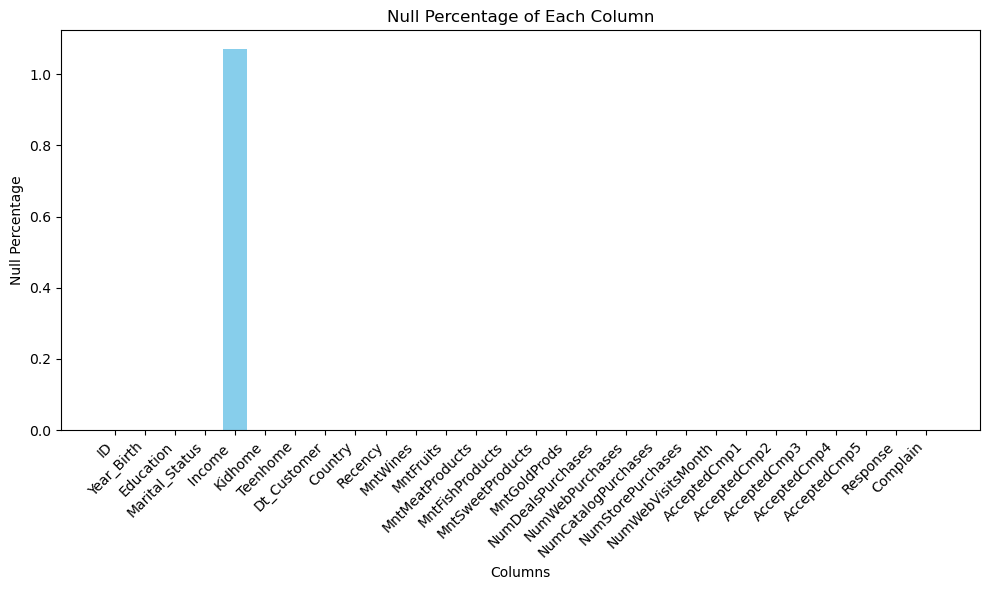

In [15]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(null_df['Column'], null_df['Null Percentage'], color='skyblue')
plt.title('Null Percentage of Each Column')
plt.xlabel('Columns')
plt.ylabel('Null Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

#### Number of Zero Values

In [16]:
zero_count = (merged_df == 0).sum()
zero_count 

ID                        1
Year_Birth                0
Education                 0
Marital_Status            0
 Income                   0
Kidhome                1293
Teenhome               1158
Dt_Customer               0
Country                   0
Recency                  28
MntWines                 13
MntFruits               400
MntMeatProducts           1
MntFishProducts         384
MntSweetProducts        419
MntGoldProds             61
NumDealsPurchases        46
NumWebPurchases          49
NumCatalogPurchases     586
NumStorePurchases        15
NumWebVisitsMonth        11
AcceptedCmp1           2096
AcceptedCmp2           2210
AcceptedCmp3           2077
AcceptedCmp4           2073
AcceptedCmp5           2077
Response               1906
Complain               2219
dtype: int64

#### Percentage of Zero Values

In [17]:
# Percentage of zero values
zero_percentage = ((merged_df.select_dtypes(include=np.number) == 0).mean() * 100).round(2)

In [18]:
#Turning into Dataframe
zero_df = pd.DataFrame({'Column': zero_percentage.index, 'Zero Percentage': zero_percentage.values})
zero_df

,Column,Zero Percentage
0,ID,0.04
1,Year_Birth,0.00
2,Kidhome,57.72
3,Teenhome,51.70
4,Recency,1.25
5,MntWines,0.58
6,MntFruits,17.86
7,MntMeatProducts,0.04
8,MntFishProducts,17.14
9,MntSweetProducts,18.71


#### Visualizing Proportion of Zero Values in the Dataset

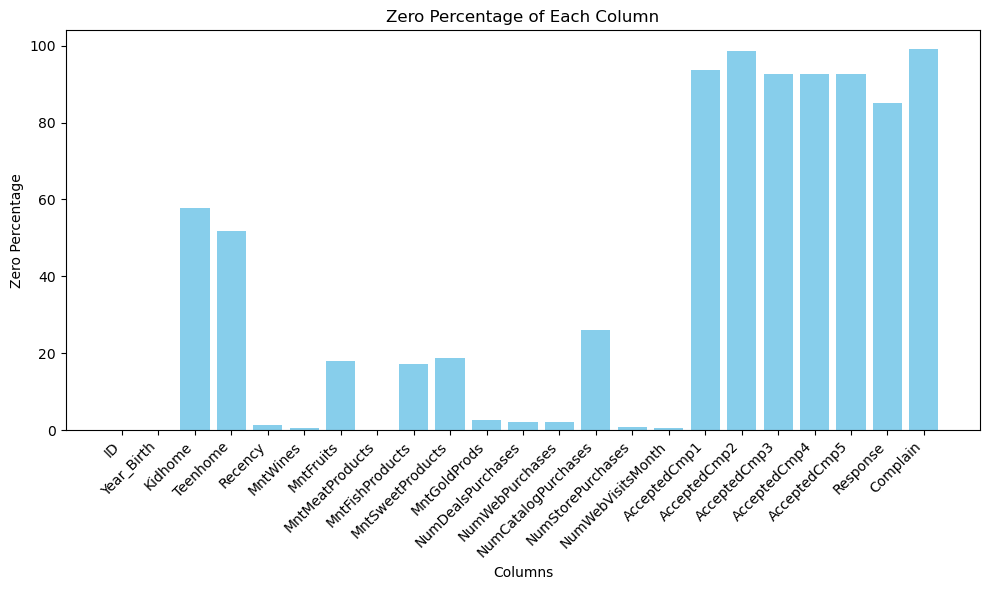

In [19]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(zero_df['Column'], zero_df['Zero Percentage'], color='skyblue')
plt.title('Zero Percentage of Each Column')
plt.xlabel('Columns')
plt.ylabel('Zero Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

## Data Cleaning and Preprocessing

In [20]:
# Converting Dt_Customer column to date type
merged_df['Dt_Customer'] = pd.to_datetime(merged_df['Dt_Customer'])

In [21]:
# Renaming Income column to Income_$
merged_df = merged_df.rename(columns={' Income ': 'Income_$'})

In [22]:
# Cleaning Income column and imputing null values with zero assuming they don't have any income source
merged_df['Income_$'] =(merged_df['Income_$'].str.replace('[$,]', '', regex=True).str.strip().replace('', pd.NA).astype(float).fillna(0).astype(int))

Comment:- Income Column was filled with zero values where there were null values assuming that those customer have no income source available and might be a dependant one. 

#### Looking at Merged Data info after Data cleaning and preprocessing

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income_$             2240 non-null   int32         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Country              2240 non-null   object        
 9   Recency              2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [24]:
merged_df.head()

,ID,Year_Birth,Education,Marital_Status,Income_$,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,SP,0,...,1,2,7,0,0,1,0,0,1,0


### A. Univariates for continuous variables (mean, 25th, 50th, 75th, 90th and 95th percentile, min and max)

In [25]:
# Identify numeric columns
numeric_columns = merged_df.select_dtypes(include=np.number).columns

# Identify categorical columns (assuming they are of object type)
categorical_columns = merged_df.select_dtypes(include='object').columns

# Exclude 'year', 'id', and categorical columns
columns_of_interest = [col for col in numeric_columns if col not in ['Year_Birth', 'ID']] 

# Calculate univariate statistics for selected columns
univariate_stats = merged_df[columns_of_interest].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95])

# Add min and max to the DataFrame
univariate_stats.loc['min'] = merged_df[columns_of_interest].min()
univariate_stats.loc['max'] = merged_df[columns_of_interest].max()

# Display the univariate statistics
univariate_stats

,Income_$,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51687.459375,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,2.662054,5.790179,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,0.009375
std,25609.342730,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.923101,3.250958,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.096391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,79800.300000,1.000000,1.000000,89.000000,822.100000,83.000000,499.000000,120.000000,89.000000,122.000000,...,7.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
95%,83927.000000,1.000000,1.000000,94.000000,1000.000000,123.000000,687.100000,168.050000,126.000000,165.050000,...,9.000000,12.000000,8.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### B. Univariates for categorical variables

#### Unique Values in Categorical Column

In [26]:
# Finding unique values in each categorical column
for col in merged_df.select_dtypes(include=object).columns:
    unique_values = merged_df[col].unique()
    print(f"Column {col}: Unique values: {unique_values}")

Column Education: Unique values: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Column Marital_Status: Unique values: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Column Country: Unique values: ['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']


#### Unique and Missing Value Counts in Categorical Column

In [27]:
# Calculate percentage of missing values and number of unique values for each categorical column
categorical_stats = pd.DataFrame(columns=['Missing%', 'Unique'])

for column in merged_df.select_dtypes(include='object').columns:
    missing_percentage = (merged_df[column].isna().sum() / len(merged_df)) * 100
    unique_values = merged_df[column].nunique()
    categorical_stats.loc[column] = [missing_percentage, unique_values]

# Display the categorical statistics
categorical_stats

,Missing%,Unique
Education,0.0,5.0
Marital_Status,0.0,8.0
Country,0.0,8.0


### Que. 4 Extreme values of variables representing income, amount of money spent on various categories, recency of purchase

#### Outlier Values

In [48]:
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# List of columns to check for outliers
columns_to_check = ['Year_Birth','Income_$', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize an empty list to store outlier DataFrames
outliers_dfs = []

# Identify outliers for each column and store in a list
for column in columns_to_check:
    outliers = detect_outliers_iqr(merged_df[column])
    outliers_df = pd.DataFrame({'Column': column, 'Outliers': outliers})
    outliers_dfs.append(outliers_df)

# Concatenate all outlier DataFrames into a single DataFrame
outliers_df = pd.concat(outliers_dfs, ignore_index=True)

# Display the DataFrame containing outliers
outliers_df


,Column,Outliers
0,Year_Birth,1893
1,Year_Birth,1899
2,Year_Birth,1900
3,Income_$,157146
4,Income_$,160803
...,...,...
1121,MntGoldProds,191
1122,MntGoldProds,139
1123,MntGoldProds,187
1124,MntGoldProds,183


In [50]:
outliers_df[outliers_df['Column'] == 'Income_$']['Outliers'].tolist()

[157146, 160803, 666666, 162397, 157733, 153924, 156924, 157243]

#### Let's Scale the values

In [29]:
from sklearn.preprocessing import StandardScaler

# Assuming 'merged_df' is your DataFrame containing the data
# List of columns to standardize
columns_to_standardize = ['Income_$', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
merged_df_scaled = merged_df.copy()  # Create a copy of the DataFrame to avoid modifying the original data
merged_df_scaled[columns_to_standardize] = scaler.fit_transform(merged_df_scaled[columns_to_standardize])

# Now, the data in the selected columns is standardized
# We can proceed to detect outliers using the IQR method on the standardized data

#### Plotting Box Plot

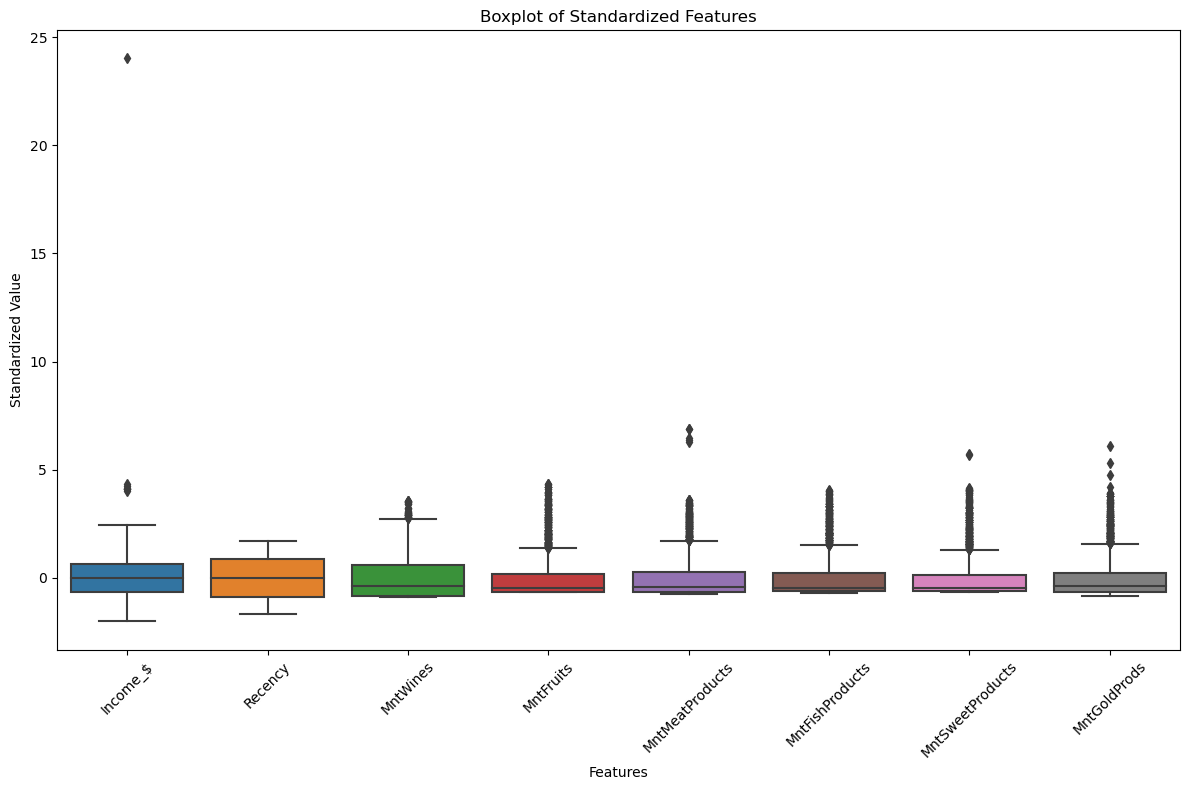

In [30]:
# Assuming 'merged_df_scaled' is your DataFrame containing the standardized data

# Plot boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df_scaled[columns_to_standardize], orient='v')
plt.title('Boxplot of Standardized Features')
plt.ylabel('Standardized Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

#### Outliers Count

In [31]:
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers_count

# List of columns to check for outliers
columns_to_check = ['Income_$', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize an empty list to store outlier DataFrames
outliers_dfs = []

# Calculate outliers count for each column and store in a list
for column in columns_to_check:
    outliers_count = detect_outliers_iqr(merged_df[column])
    outliers_df = pd.DataFrame({'Column': [column], 'Outliers Count': [outliers_count]})
    outliers_dfs.append(outliers_df)

# Concatenate all outlier DataFrames into a single DataFrame
outliers_count_df = pd.concat(outliers_dfs, ignore_index=True)

# Display the DataFrame containing outliers count
outliers_count_df

,Column,Outliers Count
0,Income_$,8
1,Recency,0
2,MntWines,35
3,MntFruits,227
4,MntMeatProducts,175
5,MntFishProducts,223
6,MntSweetProducts,248
7,MntGoldProds,207


# Task 2

### Que. 5 Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns.

In [32]:
# Step 1: Importing Necessary Libraries
from scipy.stats import ttest_ind

In [33]:
# Step 2: Define a Function to Conduct T-tests
def conduct_ttests(data, categories, campaigns):
    """
    Function to conduct independent sample t-tests for comparing the mean amount spent on different categories
    between customers who responded positively and those who did not in each marketing campaign.
    
    Parameters:
    - merged_df: Merged dataset containing information on amount spent on different categories and response rates
    - categories: List of categories (e.g., 'MntWines', 'MntFruits', etc.)
    - campaigns: List of campaigns (e.g., 'AcceptedCmp1', 'AcceptedCmp2', etc.)
    
    Returns:
    - Dictionary containing t-statistic, p-value, and interpretation for each t-test conducted
    """
    results = {}
    for category in categories:
        for campaign in campaigns:
            # Select data for customers who accepted the offer in the campaign
            accepted = data[data[campaign] == 1][category]
            # Select data for customers who did not accept the offer in the campaign
            not_accepted = data[data[campaign] == 0][category]
            # Conduct independent sample t-test
            t_statistic, p_value = ttest_ind(accepted, not_accepted, equal_var=False)
            # Null Hypothesis (H0): There is no significant difference in the mean amount spent
            # on different categories between customers who responded positively and those who did not
            # Alternative Hypothesis (H1): There is a significant difference in the mean amount spent
            # on different categories between customers who responded positively and those who did not
            # Determine interpretation based on the p-value
            if p_value < 0.05:
                interpretation = "Reject Null Hypothesis (Significant Difference)"
            else:
                interpretation = "Fail to Reject Null Hypothesis (No Significant Difference)"
            # Store results in the dictionary
            results[(category, campaign)] = {'t_statistic': t_statistic, 'p_value': p_value, 'interpretation': interpretation}
    return results

In [34]:
# Step 3: Define the List of Categories and Campaigns
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

In [35]:
# Step 4: Perform T-tests
# Call the function to conduct t-tests
ttest_results = conduct_ttests(merged_df, categories, campaigns)

In [36]:
# Convert the t-test results dictionary to a DataFrame
ttest_df = pd.DataFrame.from_dict(ttest_results, orient='index')

# Reset index to separate the category and campaign into individual columns
ttest_df.reset_index(inplace=True)
ttest_df.rename(columns={'level_0': 'Category', 'level_1': 'Campaign'}, inplace=True)

# Display the DataFrame
print("DataFrame of T-test Results:")
ttest_df

DataFrame of T-test Results:


,Category,Campaign,t_statistic,p_value,interpretation
0,MntWines,AcceptedCmp1,16.972571,1.106984e-37,Reject Null Hypothesis (Significant Difference)
1,MntWines,AcceptedCmp2,7.039273,8.952398e-08,Reject Null Hypothesis (Significant Difference)
2,MntWines,AcceptedCmp3,2.526692,1.237514e-02,Reject Null Hypothesis (Significant Difference)
3,MntWines,AcceptedCmp4,15.849941,3.180321e-36,Reject Null Hypothesis (Significant Difference)
4,MntWines,AcceptedCmp5,22.829574,2.308869e-55,Reject Null Hypothesis (Significant Difference)
5,MntWines,Response,9.574842,1.149555e-19,Reject Null Hypothesis (Significant Difference)
6,MntFruits,AcceptedCmp1,6.740147,3.072716e-10,Reject Null Hypothesis (Significant Difference)
7,MntFruits,AcceptedCmp2,-0.593962,5.569415e-01,Fail to Reject Null Hypothesis (No Significant...
8,MntFruits,AcceptedCmp3,0.652165,5.151064e-01,Fail to Reject Null Hypothesis (No Significant...
9,MntFruits,AcceptedCmp4,0.494386,6.215883e-01,Fail to Reject Null Hypothesis (No Significant...


### Que. 6 Create a funnel analysis showing what percentage of unique customers accept campaign 1,2, 3,..etc

In [37]:
flow_count = [
merged_df[(merged_df['AcceptedCmp1']==1)].shape[0],
merged_df[(merged_df['AcceptedCmp2']==1)].shape[0],
merged_df[(merged_df['AcceptedCmp3']==1)].shape[0],
merged_df[(merged_df['AcceptedCmp4']==1)].shape[0],
merged_df[(merged_df['AcceptedCmp5']==1)].shape[0],
merged_df[(merged_df['Response']==1)].shape[0]
]

In [38]:
stages = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Response']

#### Funnel Analysis of Campaigns

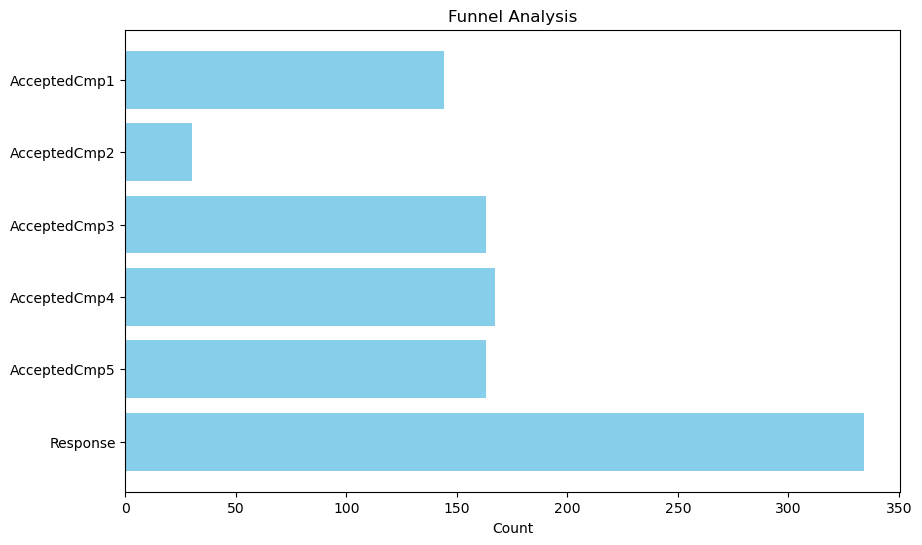

In [39]:
# Plot the funnel
plt.figure(figsize=(10, 6))
plt.barh(stages,flow_count , color='skyblue')
plt.xlabel('Count')
plt.title('Funnel Analysis')
plt.gca().invert_yaxis()  # Invert y-axis to show the funnel shape
plt.show()

### Que. 7 Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products

#### Let's remove outlier values from Income column for better analysis

In [53]:
# Get the list of outlier values for the 'Income_$' feature
outliers_income = outliers_df[outliers_df['Column'] == 'Income_$']['Outliers'].tolist()

# Remove outliers from the main DataFrame for the 'Income_$' feature
clean_df = merged_df[~merged_df['Income_$'].isin(outliers_income)]

In [91]:
outliers_income

[157146, 160803, 666666, 162397, 157733, 153924, 156924, 157243]

In [96]:
# Step 1: Create Income Bins
income_bins = pd.cut(clean_df['Income_$'], bins=16)  # Divide income into 16 bins

# Step 2: Group Data by Income Bins
income_groups = clean_df.groupby(income_bins)

# Step 3: Calculate Mean Spending on Product Categories for Each Income Bin
mean_spending = income_groups[['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts']].mean()

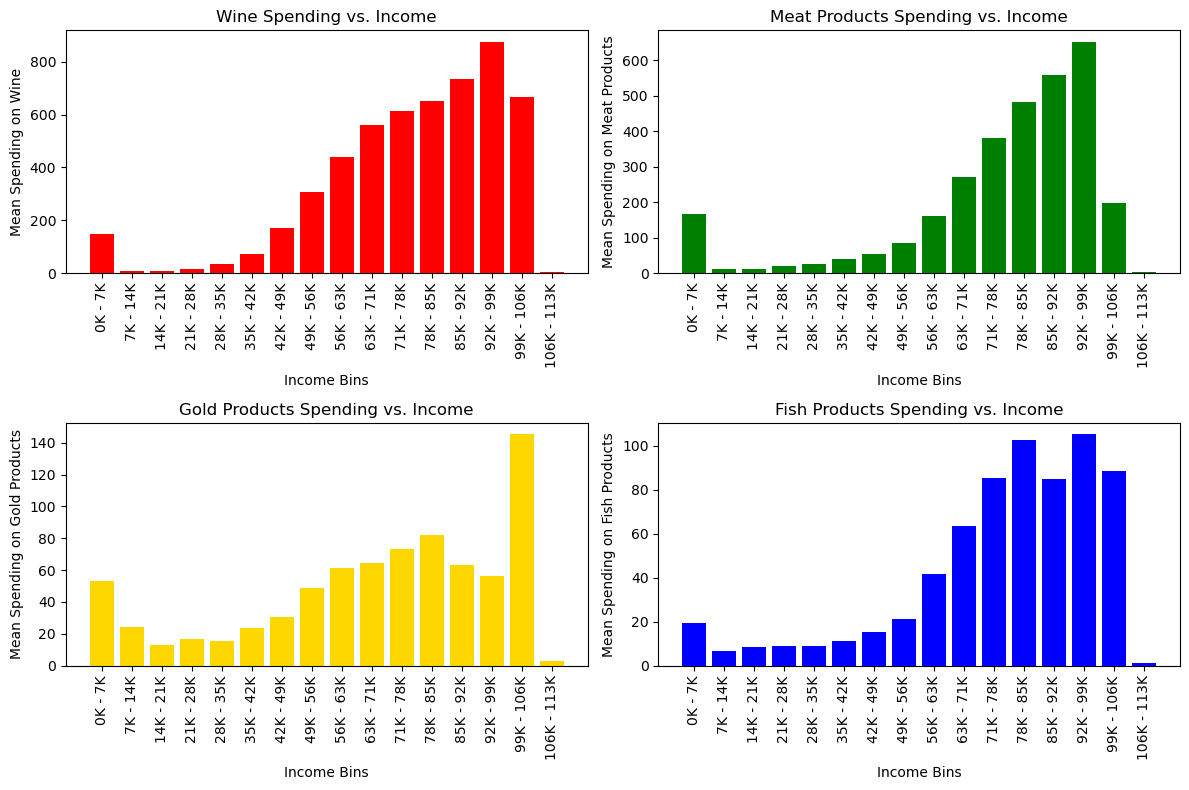

In [97]:
# Convert income bins to readable format (e.g., 33333 to 33.3K)
income_labels = [f'{int(income.left / 1000)}K - {int(income.right / 1000)}K' for income in mean_spending.index]

# Step 4: Visualize the Impact of Income on Spending
plt.figure(figsize=(12, 8))

# Wine Spending vs. Income
plt.subplot(2, 2, 1)
plt.bar(income_labels, mean_spending['MntWines'], color='red')
plt.title('Wine Spending vs. Income')
plt.xlabel('Income Bins')
plt.ylabel('Mean Spending on Wine')
plt.xticks(rotation=90)  # Rotate x-axis labels

# Meat Products Spending vs. Income
plt.subplot(2, 2, 2)
plt.bar(income_labels, mean_spending['MntMeatProducts'], color='green')
plt.title('Meat Products Spending vs. Income')
plt.xlabel('Income Bins')
plt.ylabel('Mean Spending on Meat Products')
plt.xticks(rotation=90)  # Rotate x-axis labels

# Gold Products Spending vs. Income
plt.subplot(2, 2, 3)
plt.bar(income_labels, mean_spending['MntGoldProds'], color='gold')
plt.title('Gold Products Spending vs. Income')
plt.xlabel('Income Bins')
plt.ylabel('Mean Spending on Gold Products')
plt.xticks(rotation=90)  # Rotate x-axis labels

# Fish Products Spending vs. Income
plt.subplot(2, 2, 4)
plt.bar(income_labels, mean_spending['MntFishProducts'], color='blue')
plt.title('Fish Products Spending vs. Income')
plt.xlabel('Income Bins')
plt.ylabel('Mean Spending on Fish Products')
plt.xticks(rotation=90)  # Rotate x-axis label

plt.tight_layout()
plt.show()

### Que. 8 Can you test the hypothesis that recent customers complain less in general compared to older customers?

In [56]:
from scipy.stats import chi2_contingency

# Define recent and older customer groups based on recency
recent_customers = merged_df[merged_df['Recency'] <= 50]  # Customers who made a purchase in last 50 days
older_customers = merged_df[merged_df['Recency'] > 50]   # Customers who made a purchase more than 50 days ago

In [57]:
# Calculate complaint rates for each group
recent_complaint_rate = recent_customers['Complain'].mean()
older_complaint_rate = older_customers['Complain'].mean()

In [58]:
# Perform chi-square test of independence
observed = pd.crosstab(merged_df['Recency'] <= 50, merged_df['Complain'])
chi2, p_val, _, _ = chi2_contingency(observed)

# Print results
print(f"Complaint Rate for Recent Customers: {recent_complaint_rate:.2f}")
print(f"Complaint Rate for Older Customers: {older_complaint_rate:.2f}")
print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")

# Interpret results
if p_val < 0.05:
    print("There is a significant association between recency and complaint status.")
else:
    print("There is no significant association between recency and complaint status.")

Complaint Rate for Recent Customers: 0.01
Complaint Rate for Older Customers: 0.01
Chi-square Statistic: 0.00
P-value: 1.0000
There is no significant association between recency and complaint status.


### Que 9. Do people who accept the offer in the first campaign also accept in any other campaign?

In [60]:
# Filter the dataset to include only individuals who accepted the offer in the first campaign
accepted_first_campaign = merged_df[merged_df['AcceptedCmp1'] == 1]

# Calculate the proportion of individuals who accepted each subsequent campaign among those who accepted the first campaign
subsequent_campaigns = ['AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
proportions = {}
for campaign in subsequent_campaigns:
    proportion_accepted = accepted_first_campaign[campaign].mean()
    proportions[campaign] = proportion_accepted

# Print the proportions
print("Proportions of acceptance in subsequent campaigns among those who accepted the first campaign:")
for campaign, proportion in proportions.items():
    print(f"{campaign}: {proportion:.2f}")

Proportions of acceptance in subsequent campaigns among those who accepted the first campaign:
AcceptedCmp2: 0.09
AcceptedCmp3: 0.17
AcceptedCmp4: 0.33
AcceptedCmp5: 0.47
Response: 0.55


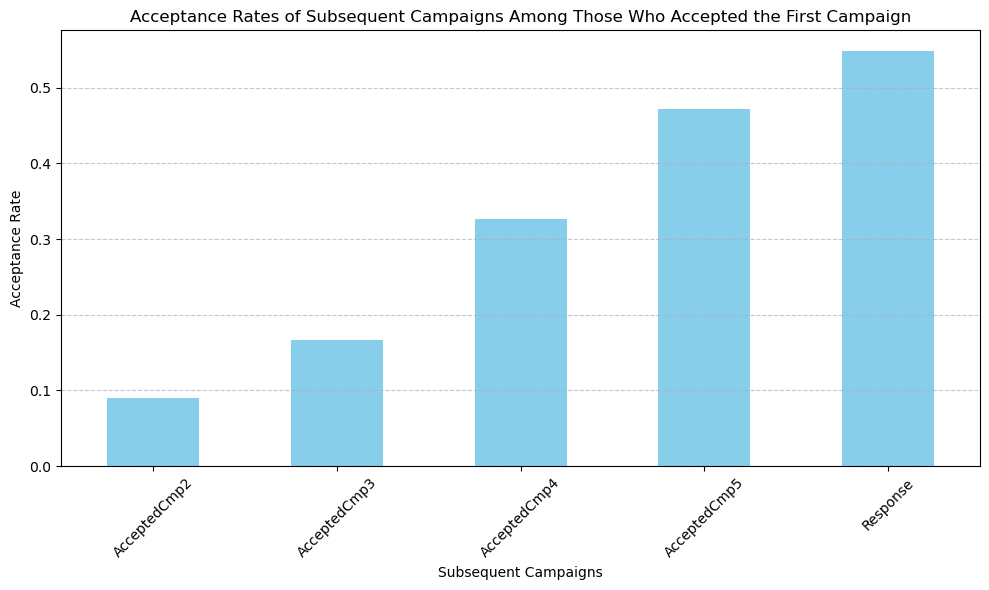

In [61]:
# Convert proportions dictionary to a pandas Series for easier plotting
proportions_series = pd.Series(proportions)

# Create a bar plot
plt.figure(figsize=(10, 6))
proportions_series.plot(kind='bar', color='skyblue')
plt.title('Acceptance Rates of Subsequent Campaigns Among Those Who Accepted the First Campaign')
plt.xlabel('Subsequent Campaigns')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Que 10. Profile of people who respond vs. who don’t.

#### Let's remove outlier values from Income and Year_Birth columns for better analysis

In [84]:
# Get the list of outlier values for the 'Year_Birth' and 'Income_$' features
outliers_year_income = outliers_df[outliers_df['Column'].isin(['Year_Birth', 'Income_$'])]['Outliers']

# Remove outliers from the main DataFrame for the 'Year_Birth' and 'Income_$' features
new_clean_df = merged_df[~merged_df.isin(outliers_year_income.values).any(axis=1)]

In [87]:
# Split the dataset into responders and non-responders
responders = new_clean_df[new_clean_df['Response'] == 1]
non_responders = new_clean_df[new_clean_df['Response'] == 0]

# Explore demographic characteristics
demographic_columns = ['Year_Birth', 'Education', 'Marital_Status', 'Income_$', 'Kidhome', 'Teenhome', 'Country']

# Compare distributions of demographic variables between responders and non-responders
for column in demographic_columns:
    print(f"Demographic Variable: {column}")
    print("Responders:")
    print(responders[column].describe())
    print("Non-Responders:")
    print(non_responders[column].describe())
    print("\n")

Demographic Variable: Year_Birth
Responders:
count     334.000000
mean     1969.416168
std        12.398192
min      1943.000000
25%      1959.000000
50%      1971.000000
75%      1979.000000
max      1996.000000
Name: Year_Birth, dtype: float64
Non-Responders:
count    1895.000000
mean     1968.795778
std        11.582357
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


Demographic Variable: Education
Responders:
count            334
unique             5
top       Graduation
freq             152
Name: Education, dtype: object
Non-Responders:
count           1895
unique             5
top       Graduation
freq             972
Name: Education, dtype: object


Demographic Variable: Marital_Status
Responders:
count        334
unique         8
top       Single
freq         106
Name: Marital_Status, dtype: object
Non-Responders:
count        1895
unique          8
top       Married
freq          763
Na

In [88]:
def plot_histogram(data, variable, group, ax):
    ax.hist(data[variable], bins=20, color='blue', alpha=0.5, label=group, density=True)
    ax.set_title(f'Distribution of {variable} ({group})')
    ax.set_xlabel(variable)
    ax.set_ylabel('Density')

def plot_barplot(data, variable, group, ax):
    data_counts = data[variable].value_counts(normalize=True)
    data_counts.plot(kind='bar', color='blue', alpha=0.5, label=group, ax=ax)
    ax.set_title(f'Distribution of {variable} ({group})')
    ax.set_xlabel(variable)
    ax.set_ylabel('Proportion')

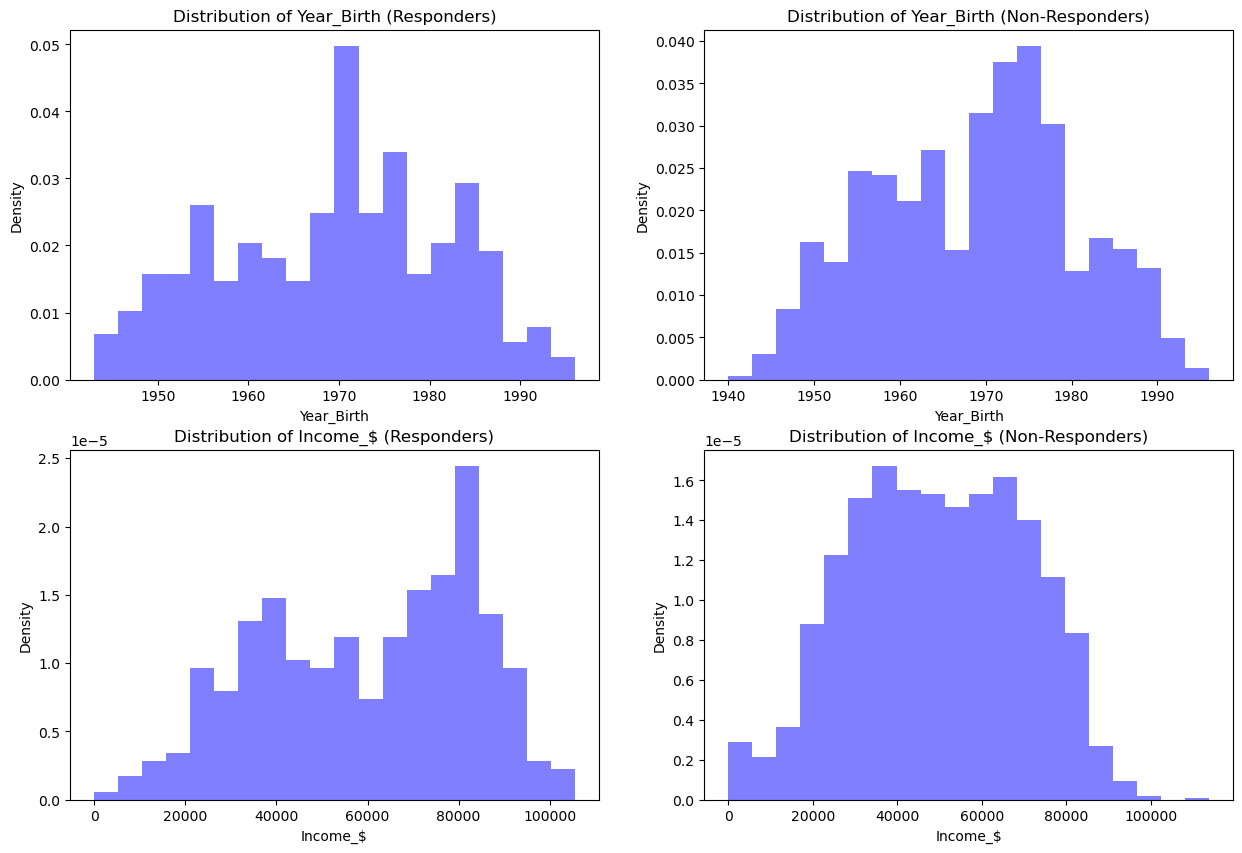

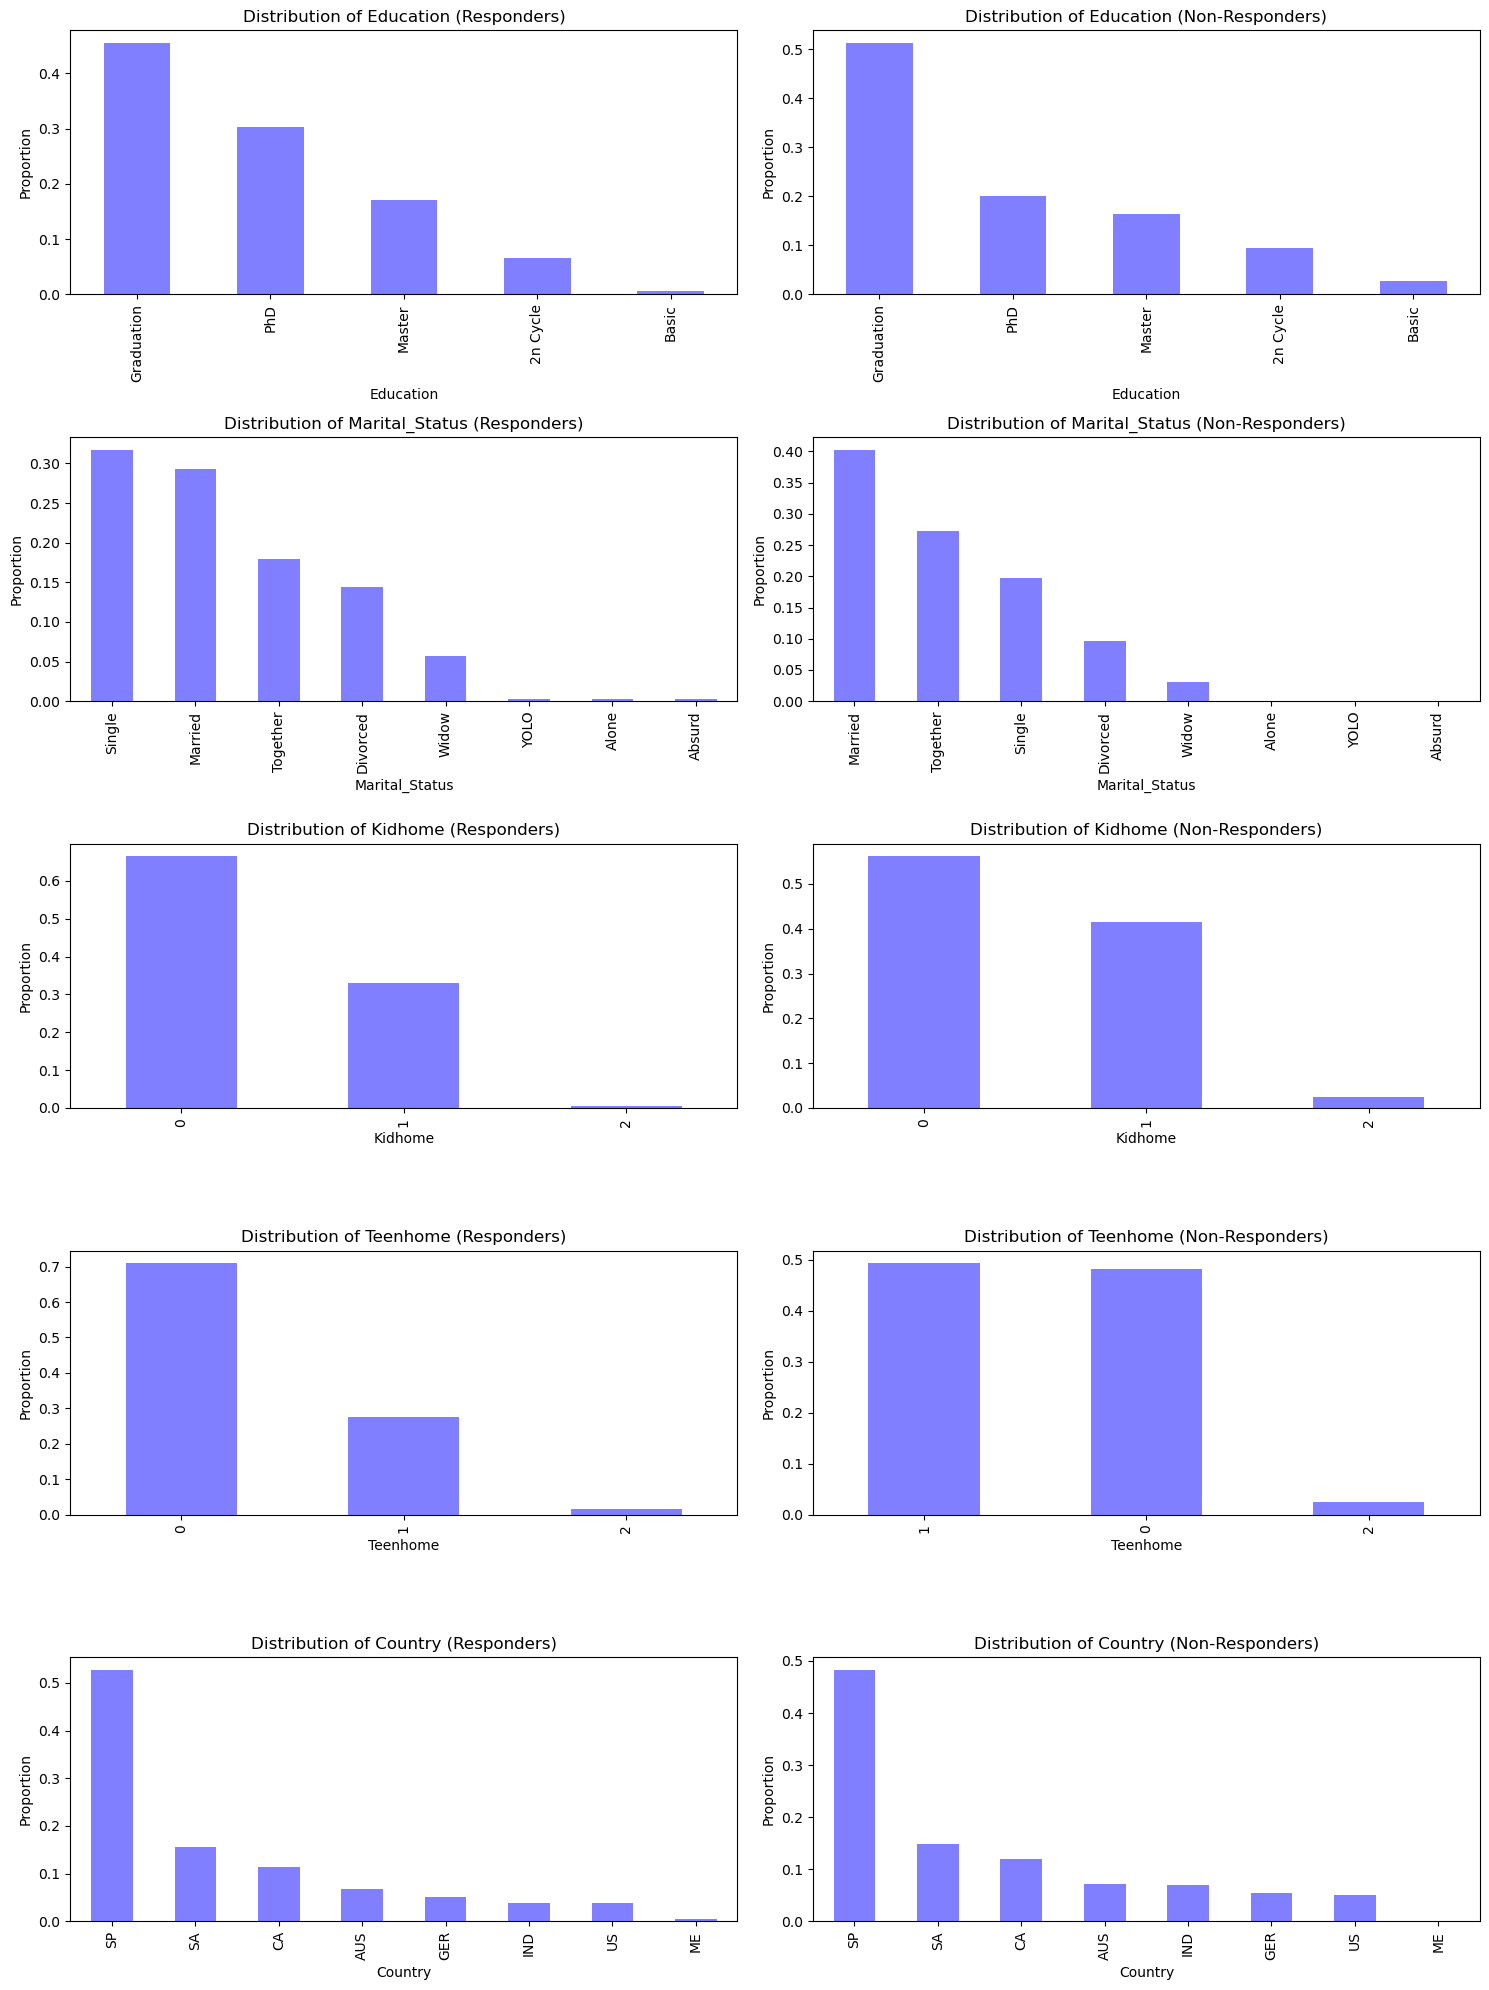

In [89]:
# Numerical variables
numerical_variables = ['Year_Birth', 'Income_$']
fig, axes = plt.subplots(len(numerical_variables), 2, figsize=(15, 10))  # Create subplots grid

for i, var in enumerate(numerical_variables):
    plot_histogram(responders, var, 'Responders', axes[i, 0])
    plot_histogram(non_responders, var, 'Non-Responders', axes[i, 1])

# Categorical variables
categorical_variables = ['Education', 'Marital_Status','Kidhome', 'Teenhome', 'Country']
fig, axes = plt.subplots(len(categorical_variables), 2, figsize=(15, 20))  # Create subplots grid

for i, var in enumerate(categorical_variables):
    plot_barplot(responders, var, 'Responders', axes[i, 0])
    plot_barplot(non_responders, var, 'Non-Responders', axes[i, 1])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()